# Training logs for min move strategy

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../logs')

In [2]:
def plot2(name0, name1, title, rate=1):
    logs0 = np.load(name0, allow_pickle=True)
    logs1 = np.load(name1, allow_pickle=True)
    print(logs1['params'])
    t_loss0 = logs0['t_loss']
    v_loss0 = logs0['v_loss']
    scores0 = logs0['min_move']
    t_loss1 = logs1['t_loss']
    v_loss1 = logs1['v_loss']
    scores1 = logs1['min_move']
    epochs0 = np.arange(len(t_loss0))
    epochs1 = np.arange(len(t_loss1))

    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax2 = ax1.twinx()
    ax1.semilogy(epochs0, t_loss0, epochs0, v_loss0)
    ax1.semilogy(epochs1, t_loss1, epochs1, v_loss1)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.plot(np.arange(0, len(t_loss0), 1/rate), scores0, color='b')
    ax2.plot(np.arange(0, len(t_loss1), 1/rate), scores1, color='g')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Mean log10 score')
    plt.title(title)
    plt.show()

In [37]:
def plotn(names, title, plot_v=True, legend=False, rate=1):
    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax2 = ax1.twinx()
    maxscore = []
    for i, name0 in enumerate(names):
        logs0 = np.load(name0, allow_pickle=True)
        t_loss0 = logs0['t_loss']
        scores0 = logs0['min_move']
        epochs0 = np.arange(len(t_loss0))
        
        ax1.semilogy(epochs0, t_loss0, color=plt.cm.tab10(i))
        if plot_v:
            v_loss0 = logs0['v_loss']
            ax1.semilogy(epochs0, v_loss0, color=plt.cm.tab20(2*i+1))
        ax2.plot(np.arange(0, len(t_loss0), 1/rate), scores0, color=plt.cm.tab10(i))
        maxscore.append(max(scores0))
    if legend:
        plt.legend([n[9:] for n in names], loc='lower right')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Min move score')
    print(logs0['params'])
    print(maxscore)
    plt.title(title)
    plt.show()

# 0-200 games
Generated 200 games using fixed LUDR move order, min_move_dead method.

Namespace(batch_size=2048, blocks=5, channels=128, decay=0.0, epochs=1000, lr=0.01, name='minmove_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


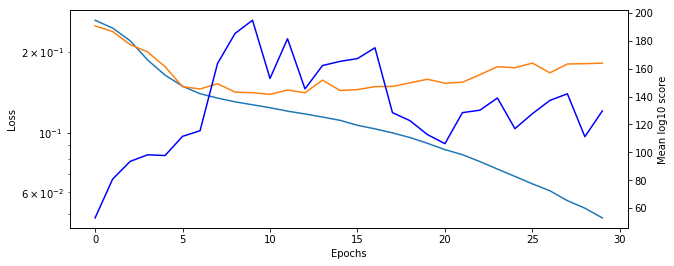

Strength peaks around the time t_loss diverges from v_loss


In [6]:
logs0 = np.load('20200126/minmove_20_200_c128b5_p20_bs2048lr0.01d0.0_s0.npz', allow_pickle=True)
print(logs0['params'])
t_loss0 = logs0['t_loss']
v_loss0 = logs0['v_loss']
scores0 = logs0['min_move']
epochs0 = np.arange(len(t_loss0))

fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
ax1.semilogy(epochs0, t_loss0, epochs0, v_loss0)
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.plot(epochs0, scores0, color='b')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.show()
print('''Strength peaks around the time t_loss diverges from v_loss''')

Namespace(batch_size=2048, blocks=5, channels=64, decay=0.0, epochs=1000, lr=0.01, name='minmove_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


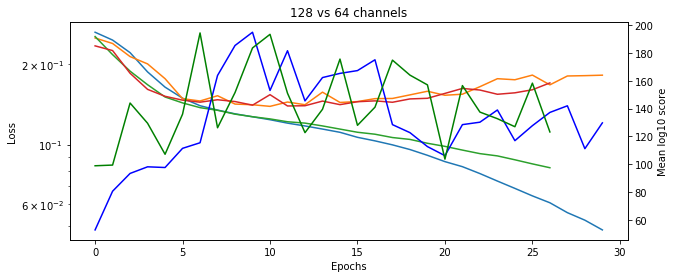

About the same. Training is much faster: 20 vs 25 it/sec


In [10]:
plot2('20200126/minmove_20_200_c128b5_p20_bs2048lr0.01d0.0_s0.npz',
      '20200126/minmove_20_200_c64b5_p20_bs2048lr0.01d0.0_s0.npz',
      '128 vs 64 channels')
print('''About the same. Training is much faster: 20 vs 25 it/sec''')

Namespace(batch_size=2048, blocks=4, channels=64, decay=0.0, epochs=1000, lr=0.01, name='minmove_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


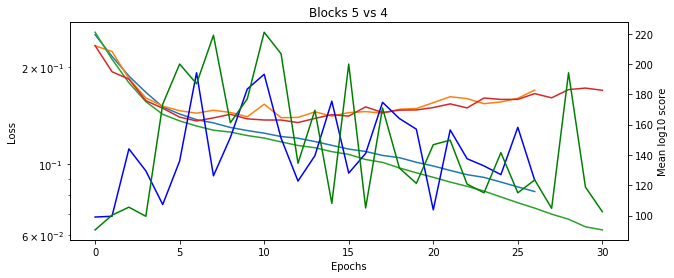

Less blocks only slightly faster: 25.5 vs 26.7


In [13]:
plot2('20200126/minmove_20_200_c64b5_p20_bs2048lr0.01d0.0_s0.npz',
      '20200126/minmove_20_200_c64b4_p20_bs2048lr0.01d0.0_s0.npz',
      'Blocks 5 vs 4')
print('''Less blocks is stronger, but only slightly faster: 25.5 vs 26.7''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.01, name='minmove_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


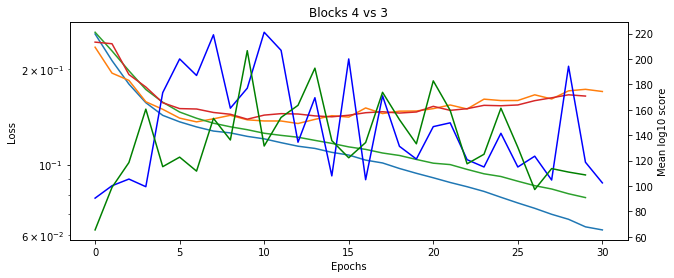

Now weaker, but much faster to train: 26.7 vs 30.1


In [16]:
plot2('20200126/minmove_20_200_c64b4_p20_bs2048lr0.01d0.0_s0.npz',
      '20200126/minmove_20_200_c64b3_p20_bs2048lr0.01d0.0_s0.npz',
      'Blocks 4 vs 3')
print('''Now weaker, but much faster to train: 26.7 vs 30.1''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.001, name='minmove_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


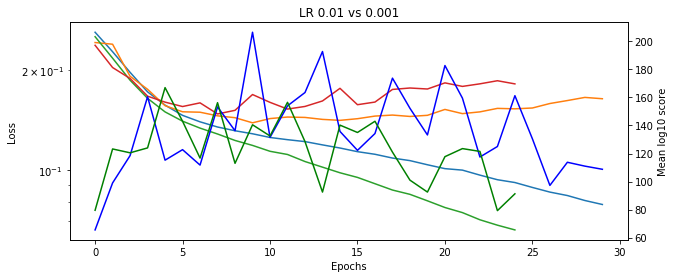

Smaller LR learns faster, but worse validation, worse strength


In [19]:
plot2('20200126/minmove_20_200_c64b3_p20_bs2048lr0.01d0.0_s0.npz',
      '20200126/minmove_20_200_c64b3_p20_bs2048lr0.001d0.0_s0.npz',
      'LR 0.01 vs 0.001')
print('''Smaller LR learns faster, but worse validation, worse strength''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.1, name='minmove_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


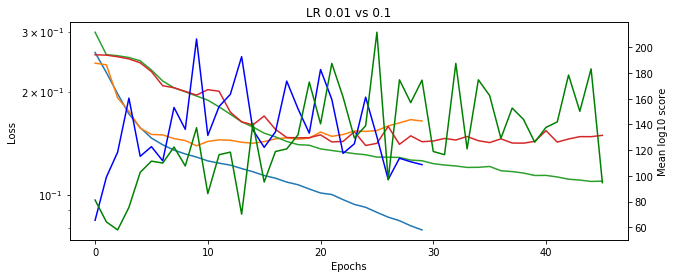

Higher LR overfits slower, got a better peak


In [21]:
plot2('20200126/minmove_20_200_c64b3_p20_bs2048lr0.01d0.0_s0.npz',
      '20200126/minmove_20_200_c64b3_p20_bs2048lr0.1d0.0_s0.npz',
      'LR 0.01 vs 0.1')
print('''Higher LR overfits slower, got a better peak''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0001, epochs=1000, lr=0.1, name='minmove_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


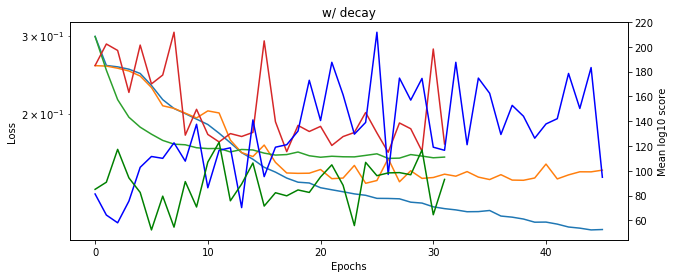

Decay is no good


In [24]:
plot2('20200126/minmove_20_200_c64b3_p20_bs2048lr0.1d0.0_s0.npz',
      '20200126/minmove_20_200_c64b3_p20_bs2048lr0.1d0.0001_s0.npz',
      'w/ decay')
print('''Decay is no good''')

Eval curves are very noisy. I will increase the number of samples to hopefully get a smoother curve. Eval actually takes longer than training.

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.1, name='minmove_sm_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


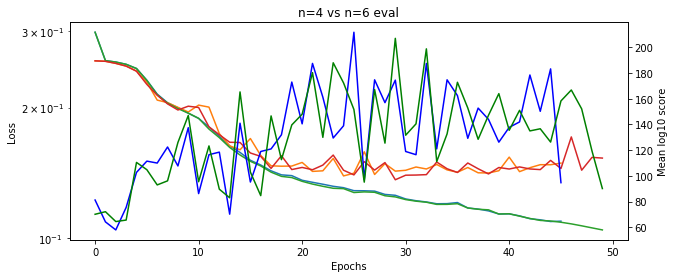

Still very noisy


In [30]:
plot2('20200126/minmove_20_200_c64b3_p20_bs2048lr0.1d0.0_s0.npz',
      '20200126/minmove_sm_20_200_c64b3_p20_bs2048lr0.1d0.0_s0.npz',
      'n=4 vs n=6 eval')
print('''Still very noisy''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.03, name='minmove_', path='selfplay/', patience=20, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


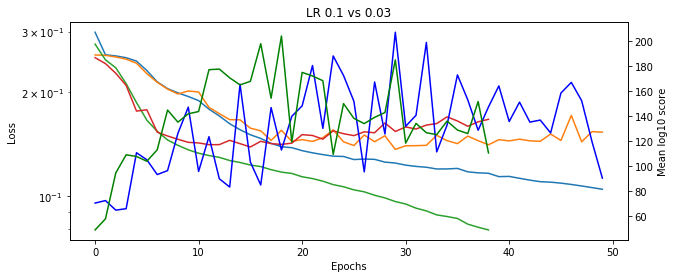

LR 0.1 is still superior


In [29]:
plot2('20200126/minmove_sm_20_200_c64b3_p20_bs2048lr0.1d0.0_s0.npz',
      '20200126/minmove_20_200_c64b3_p20_bs2048lr0.03d0.0_s0.npz',
      'LR 0.1 vs 0.03')
print('''LR 0.1 is still superior''')

If I use smoother eval curves, I can probably reduce patience to 10 epochs. Once the network starts overfitting, strength starts getting worse.

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.1, name='minmove_', path='selfplay/', patience=10, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


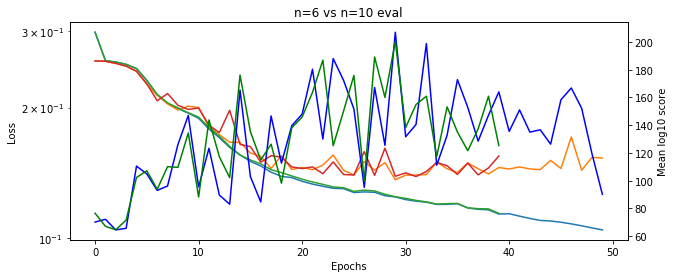

A bit smoother. Some of the peaks/valleys are real strength changes


In [31]:
plot2('20200126/minmove_sm_20_200_c64b3_p20_bs2048lr0.1d0.0_s0.npz',
      '20200126/minmove_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      'n=6 vs n=10 eval')
print('''A bit smoother. Some of the peaks/valleys are real strength changes''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.03, name='minmove_', path='selfplay/', patience=10, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


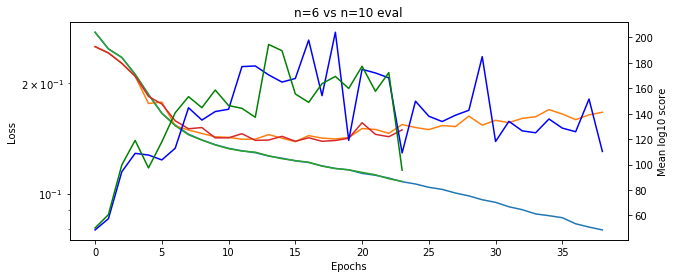

A bit smoother. 0.03 is weaker than 0.1, but can save on train time.


In [33]:
plot2('20200126/minmove_20_200_c64b3_p20_bs2048lr0.03d0.0_s0.npz',
      '20200126/minmove_20_200_c64b3_p10_bs2048lr0.03d0.0_s0.npz',
      'n=6 vs n=10 eval')
print('''A bit smoother. 0.03 is weaker than 0.1, but can save on train time.''')

Not shown: tried batch size 1024 and 4096, but all were very inferior.

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.1, name='soft1.0_', path='selfplay/', patience=10, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


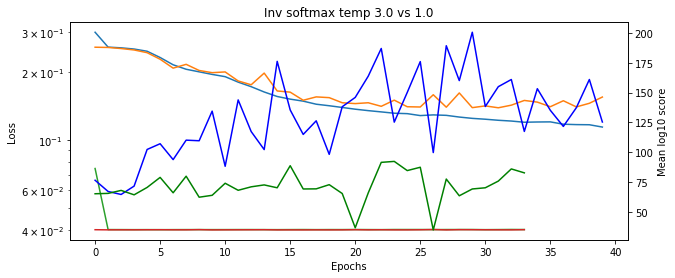

Lower inv softmax is no good


In [41]:
plot2('20200126/minmove_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      '20200126/soft1.0_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      'Inv softmax temp 3.0 vs 1.0')
print('''Lower inv softmax is no good''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.1, name='soft5.0_', path='selfplay/', patience=10, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


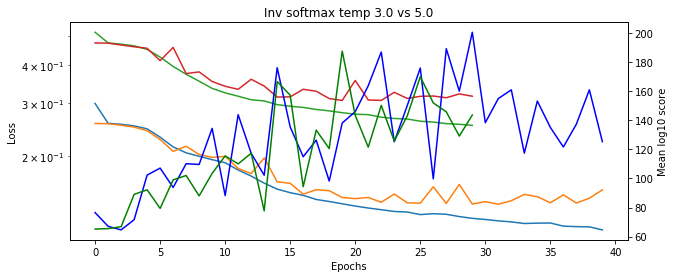

High temp is about the same. May need to lower LR to compensate for higher loss


In [43]:
plot2('20200126/minmove_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      '20200126/soft5.0_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      'Inv softmax temp 3.0 vs 5.0')
print('''High temp is about the same. May need to lower LR to compensate for higher loss''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.03, name='soft5.0_', path='selfplay/', patience=10, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


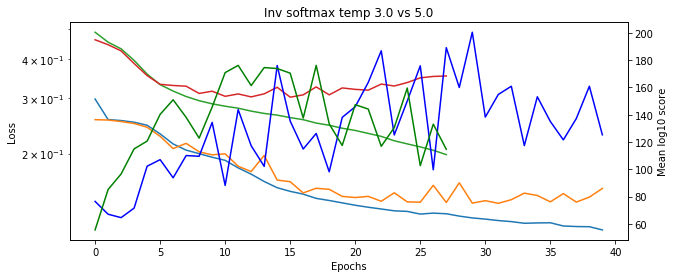

Strong climb, but peaks early and lower


In [45]:
plot2('20200126/minmove_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      '20200126/soft5.0_20_200_c64b3_p10_bs2048lr0.03d0.0_s0.npz',
      'Inv softmax temp 3.0 vs 5.0')
print('''Strong climb, but peaks early and lower''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.03, name='soft4.0_', path='selfplay/', patience=10, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


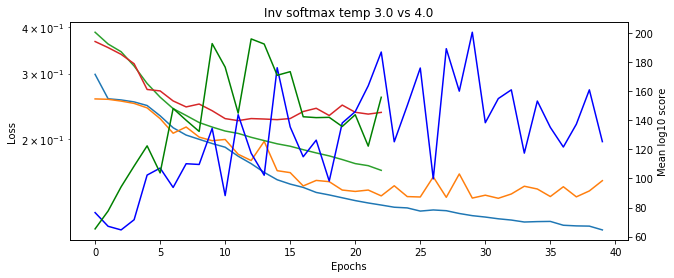

4.0 temp is comparable, but needed a lower LR


In [47]:
plot2('20200126/minmove_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      '20200126/soft4.0_20_200_c64b3_p10_bs2048lr0.03d0.0_s0.npz',
      'Inv softmax temp 3.0 vs 4.0')
print('''4.0 temp is comparable, but needed a lower LR''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.05, name='soft3.5_', path='selfplay/', patience=10, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


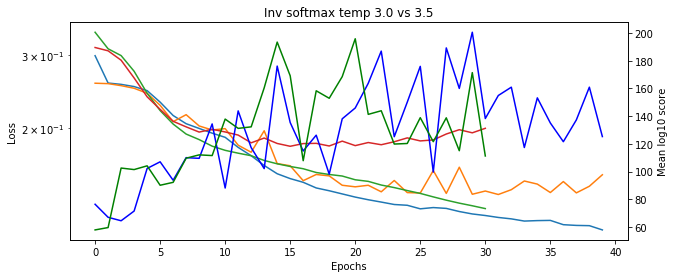

3.5 temp also comparable. Should check eval strength


In [49]:
plot2('20200126/minmove_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      '20200126/soft3.5_20_200_c64b3_p10_bs2048lr0.05d0.0_s0.npz',
      'Inv softmax temp 3.0 vs 3.5')
print('''3.5 temp also comparable. Should check eval strength''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='soft3.5_', path='selfplay/', patience=10, pretrained='', seed=0, t_tuple=[20, 200], v_tuple=[0, 20])


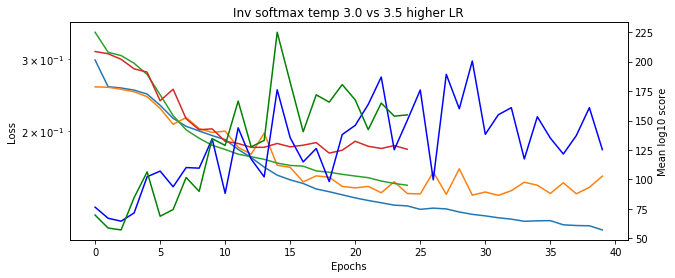

Got lucky with a 3.5 LR run


In [51]:
plot2('20200126/minmove_20_200_c64b3_p10_bs2048lr0.1d0.0_s0.npz',
      '20200126/soft3.5_20_200_c64b3_p10_bs2048lr0.08d0.0_s0.npz',
      'Inv softmax temp 3.0 vs 3.5 higher LR')
print('''Got lucky with a 3.5 LR run''')

### Getting the best seed

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.1, name='minmove_', path='selfplay/', patience=10, pretrained='', seed=4, t_tuple=[20, 200], v_tuple=[0, 20])


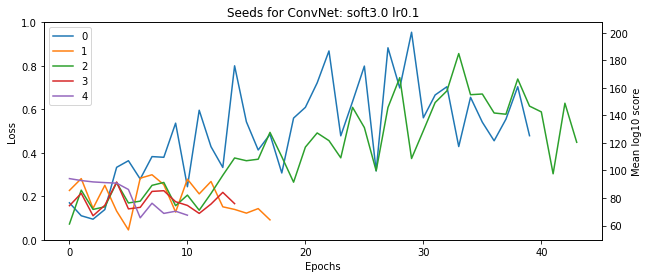

In [55]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

base_name = '20200126/minmove_20_200_c64b3_p10_bs2048lr0.1d0.0_s{}.npz'
for s in range(5):
    logs0 = np.load(base_name.format(s), allow_pickle=True)
    t_loss0 = logs0['t_loss']
    # v_loss0 = logs0['v_loss']
    scores0 = logs0['min_move']
    epochs0 = np.arange(len(t_loss0))

    #ax1.semilogy(epochs0, t_loss0)
    ax2.plot(epochs0, scores0)

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.legend(list(range(5)))
plt.title('Seeds for ConvNet: soft3.0 lr0.1')

print(logs0['params'])
plt.show()

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='soft3.5_', path='selfplay/', patience=10, pretrained='', seed=9, t_tuple=[20, 200], v_tuple=[0, 20])


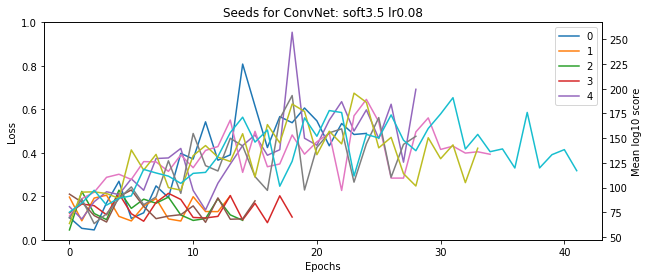

In [57]:
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()

base_name = '20200126/soft3.5_20_200_c64b3_p10_bs2048lr0.08d0.0_s{}.npz'
for s in range(10):
    logs0 = np.load(base_name.format(s), allow_pickle=True)
    t_loss0 = logs0['t_loss']
    # v_loss0 = logs0['v_loss']
    scores0 = logs0['min_move']
    epochs0 = np.arange(len(t_loss0))

    #ax1.semilogy(epochs0, t_loss0)
    ax2.plot(epochs0, scores0)

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean log10 score')
plt.legend(list(range(5)))
plt.title('Seeds for ConvNet: soft3.5 lr0.08')

print(logs0['params'])
plt.show()

Training is stochastic. A good portion of runs fail to achieve high strength.

# 0-400
200-400: selfplay games with `20200126/soft3.5_20_200_c64b3_p10_bs2048lr0.08d0.0_s4_best`

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='', seed=2, soft=3.5, t_tuple=[200, 400], v_tuple=[0, 20])


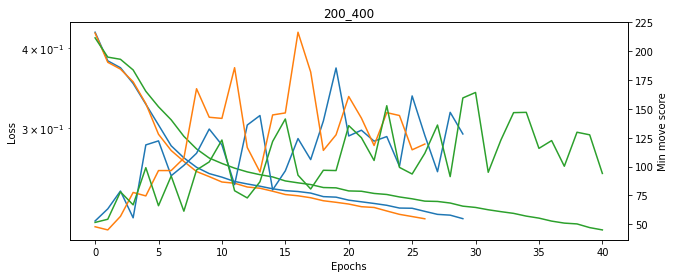

Training on 200_400 alone gives ok results, but not superior


In [15]:
names = [f'20200128/200_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}.npz' for s in range(3)]
plotn(names, '200_400', plot_v=False)
print('''Training on 200_400 alone gives ok results, but not superior''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='', seed=2, soft=3.5, t_tuple=[20, 400], v_tuple=[0, 20])


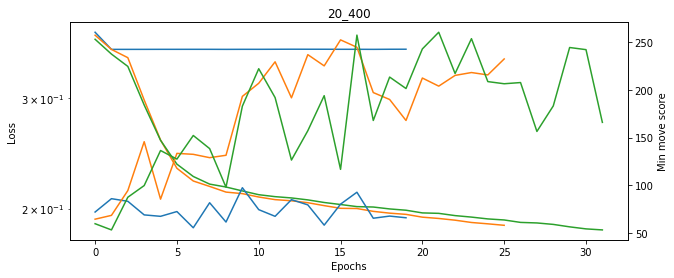

Training on full set 20_400 gives superior results


In [23]:
names = [f'20200128/20_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}.npz' for s in range(3)]
plotn(names, '20_400', plot_v=False)
print('''Training on full set 20_400 gives superior results''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='20200126/soft3.5_20_200_c64b3_p10_bs2048lr0.08d0.0_s4_best', seed=2, soft=3.5, t_tuple=[200, 400], v_tuple=[0, 20])


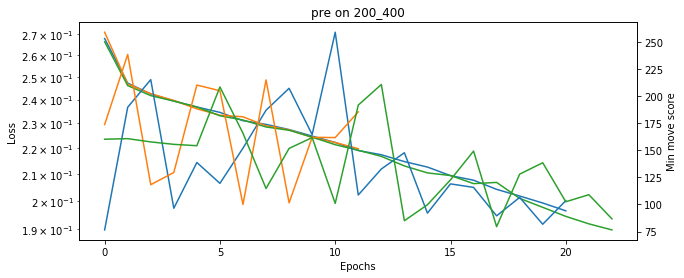

Starting from pretrained no good


In [24]:
names = [f'20200128/200_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}pre.npz' for s in range(3)]
plotn(names, 'pre on 200_400', plot_v=False)
print('''Starting from pretrained no good''')

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='20200126/soft3.5_20_200_c64b3_p10_bs2048lr0.08d0.0_s4_best', seed=2, soft=3.5, t_tuple=[20, 400], v_tuple=[0, 20])


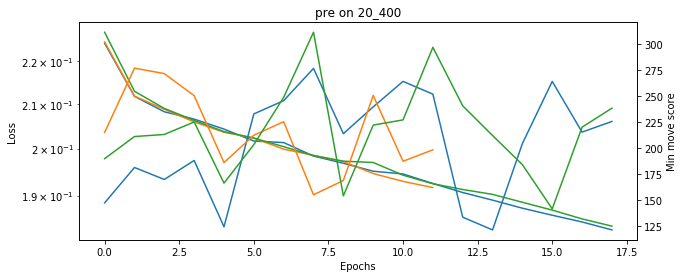

Starting from pretrained on full set gave very strong results!
It's also faster


In [25]:
names = [f'20200128/20_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}pre.npz' for s in range(3)]
plotn(names, 'pre on 20_400', plot_v=False)
print('''Starting from pretrained on full set gave very strong results!
It's also faster''')

#### Getting the best seed

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='20200126/soft3.5_20_200_c64b3_p10_bs2048lr0.08d0.0_s4_best', seed=5, soft=3.5, t_tuple=[20, 400], v_tuple=[0, 20])


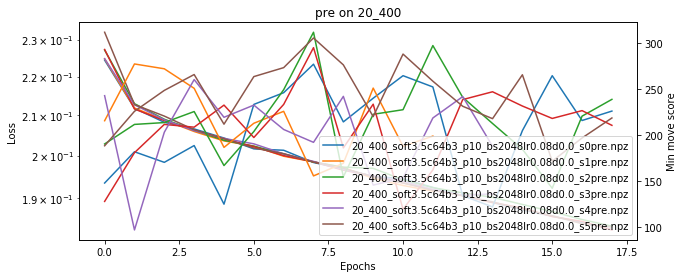

Consistently good strength on epoch 7. Will test the top 4


In [30]:
names = [f'20200128/20_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}pre.npz' for s in range(6)]
plotn(names, 'pre on 20_400', plot_v=False, legend=True)
print('''Consistently good strength on epoch 7. Will test the top 4''')

# 0-600
400-600 games: selfplay with `20200128/20_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s2pre_best`

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='', seed=2, soft=3.5, t_tuple=[400, 600])
[194.6, 159.0, 205.8]


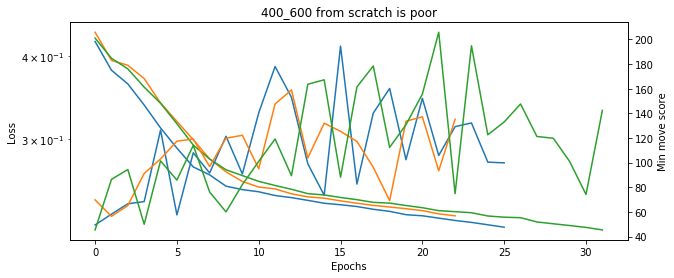

In [12]:
names = [f'20200130/400_600_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}.npz' for s in range(3)]
plotn(names, '400_600 from scratch is poor', plot_v=False)

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='', seed=2, soft=3.5, t_tuple=[200, 600])
[275.6, 261.8, 100.8]


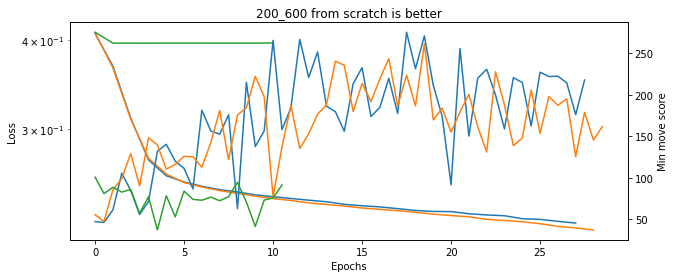

In [15]:
names = [f'20200130/200_600_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}.npz' for s in range(3)]
plotn(names, '200_600 from scratch is better', plot_v=False, rate=2)

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='', seed=7, soft=3.5, t_tuple=[0, 600])
[317.8, 323.4, 100.8, 99.6, 325.2, 314.2]


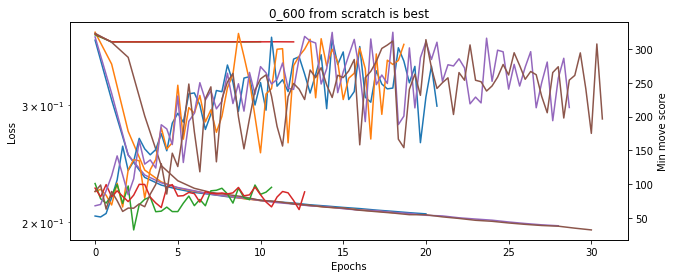

In [21]:
names = [f'20200130/0_600_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}.npz' for s in (0,1,2,3,4,7)]
plotn(names, '0_600 from scratch is best', plot_v=False, rate=3)

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='20200128/20_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s2pre_best', seed=2, soft=3.5, t_tuple=[400, 600])
[267.0, 299.4, 224.2]


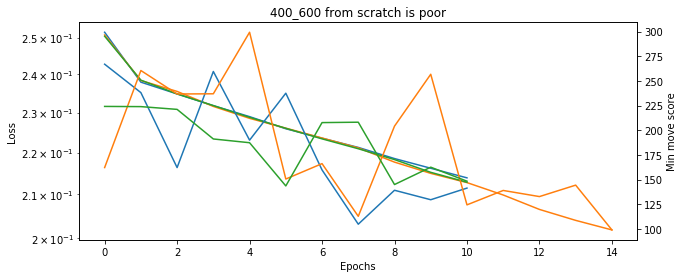

In [23]:
names = [f'20200130/400_600_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}pre.npz' for s in range(3)]
plotn(names, '400_600 from pretrained is better', plot_v=False)

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='20200128/20_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s2pre_best', seed=2, soft=3.5, t_tuple=[200, 600])
[304.2, 293.4, 302.6]


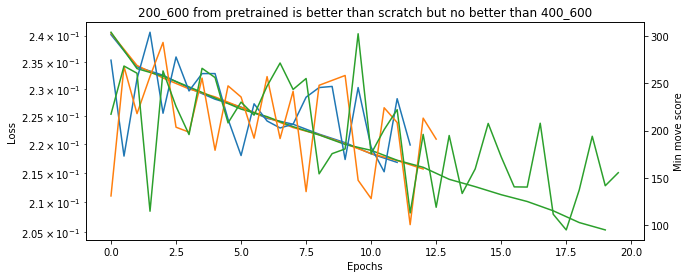

In [25]:
names = [f'20200130/200_600_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}pre.npz' for s in range(3)]
plotn(names, '200_600 from pretrained is better than scratch but no better than 400_600', plot_v=False, rate=2)

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='20200128/20_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s2pre_best', seed=2, soft=3.5, t_tuple=[0, 600])
[324.0, 331.4, 338.4]


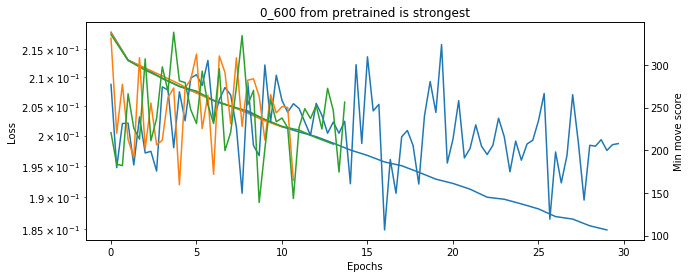

In [30]:
names = [f'20200130/0_600_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}pre.npz' for s in range(3)]
plotn(names, '0_600 from pretrained is strongest', plot_v=False, rate=3)

Namespace(batch_size=2048, blocks=3, channels=64, decay=0.0, epochs=1000, lr=0.08, name='', path='selfplay/', patience=10, pretrained='20200128/20_400_soft3.5c64b3_p10_bs2048lr0.08d0.0_s2pre_best', seed=7, soft=3.5, t_tuple=[0, 600])
[357.0, 346.8, 353.6, 347.2]


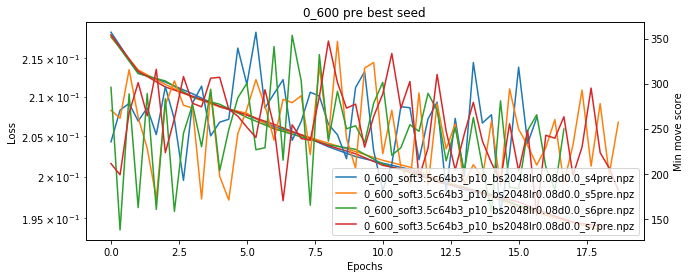

In [39]:
names = [f'20200130/0_600_soft3.5c64b3_p10_bs2048lr0.08d0.0_s{s}pre.npz' for s in (4,5,6,7)]
plotn(names, '0_600 pre best seed', plot_v=False, rate=3, legend=True)

I don't want to use strong networks that only got a small number of epochs. It means that the new data was not used much.